In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats

from matplotlib import pyplot as plt
from tqdm import tqdm

from util_read import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata, compute_period_daily

In [2]:
file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [3]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

merged_dataset = dict()
# engage_metadata = dict() 
for category in categories_eligible[1:2]:
    engage_dataset = engage_read(engage_dataset_base, category)
    tweets_dataset = engage_tweets_read(tweets_dataset_base, category)
    
    curr_merged = merge_engage_tweets(engage_dataset, tweets_dataset)
    merged_dataset.update(curr_merged)
    
print(f"Total size: {len(merged_dataset)}")

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112
Engage comedy size: 31519
Tweets comedy size: 31678
Merged size: 31456
Total size: 31456


In [12]:
timepoint = 90
pearsonr_vals = []
vids = []
for k, vals in merged_dataset.items():
    series_views = vals["viewCounts"][timepoint:]
    series_tweets = vals["tweets"][timepoint:]
    r, p = stats.pearsonr(series_views, series_tweets)
    pearsonr_vals.append([r,p])
    vids.append(k)

df_pearsonr = pd.DataFrame(pearsonr_vals, columns=["r", "p"], index=vids)
df_pearsonr = df_pearsonr[[not x for x in np.isnan(df_pearsonr["r"])]]
pd.DataFrame.describe(df_pearsonr)

,r,p
count,13923.000000,1.392300e+04
mean,0.095538,3.819990e-01
std,0.152413,3.314882e-01
min,-0.182968,2.686726e-223
25%,-0.005877,3.393569e-02
50%,0.056836,3.410854e-01
75%,0.149821,6.768821e-01
max,0.996776,1.000000e+00


Text(0, 0.5, 'Number of videos')

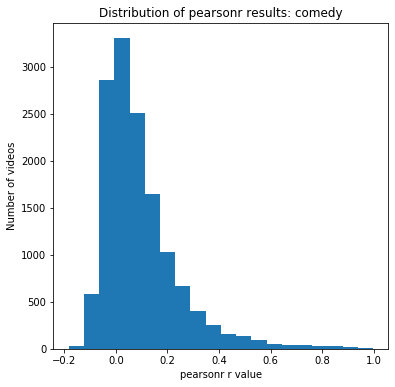

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(df_pearsonr["r"], bins=20)
ax.set_title(f"Distribution of pearsonr results: comedy")
ax.set_xlabel("pearsonr r value")
ax.set_ylabel("Number of videos")

Text(0, 0.5, 'pearsonr r value')

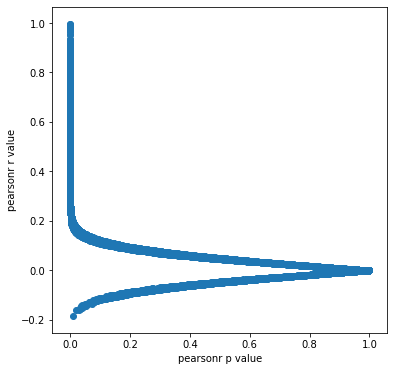

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pearsonr["p"], df_pearsonr["r"])
# ax.set_title(f"Distribution of pearsonr results: comedy")
ax.set_xlabel("pearsonr p value")
ax.set_ylabel("pearsonr r value")

In [11]:
df_filter = df_pearsonr[df_pearsonr["p"]<=0.05]

pd.DataFrame.describe(df_filter)

,r,p
count,3796.000000,3.796000e+03
mean,0.286273,8.266623e-03
std,0.161185,1.303531e-02
min,-0.182968,2.686726e-223
25%,0.176524,8.272344e-07
50%,0.234324,8.283049e-04
75%,0.338021,1.170916e-02
max,0.996776,4.997525e-02


Text(0, 0.5, 'Number of videos')

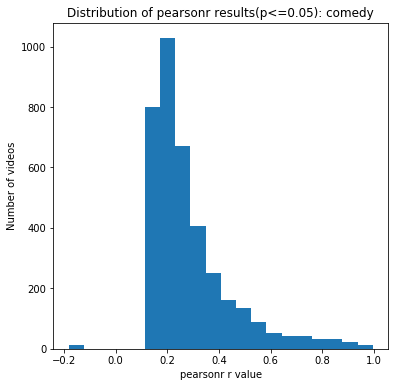

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(df_filter["r"], bins=20)
ax.set_title(f"Distribution of pearsonr results(p<=0.05): comedy")
ax.set_xlabel("pearsonr r value")
ax.set_ylabel("Number of videos")

Text(0, 0.5, 'pearsonr r value')

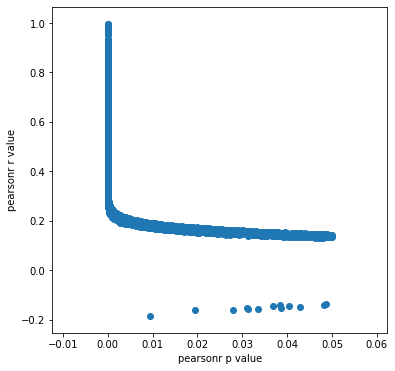

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_filter["p"], df_filter["r"])
# ax.set_title(f"Distribution of pearsonr results: comedy")
ax.set_xlabel("pearsonr p value")
ax.set_ylabel("pearsonr r value")